In [537]:
import numpy as np 
from jax import random
import jax.numpy as jnp
import matplotlib.pyplot as plt

In [538]:
np.random.random()
key = random.PRNGKey(42)

In [539]:
key, subkey = random.split(key)
random.uniform(subkey)

Array(0.91457367, dtype=float32)

In [540]:
key, subkey = random.split(key)
x = random.uniform(key,(1,1000),dtype=np.float64)*(2*np.pi)
x = jnp.sort(x)

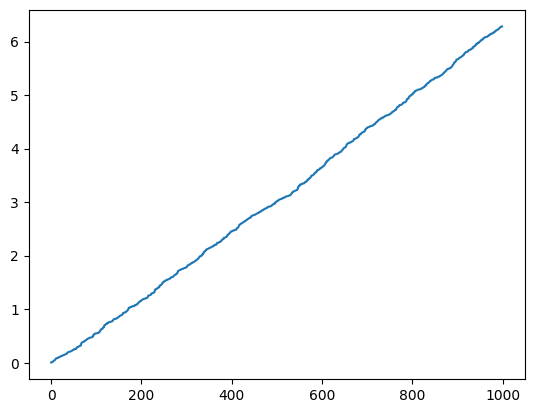

In [541]:
plt.plot(x[0])

In [542]:
y = jnp.sin(x)



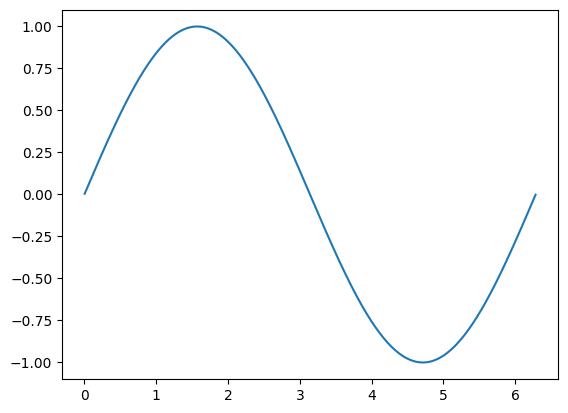

In [543]:
plt.plot(x[0],y[0])

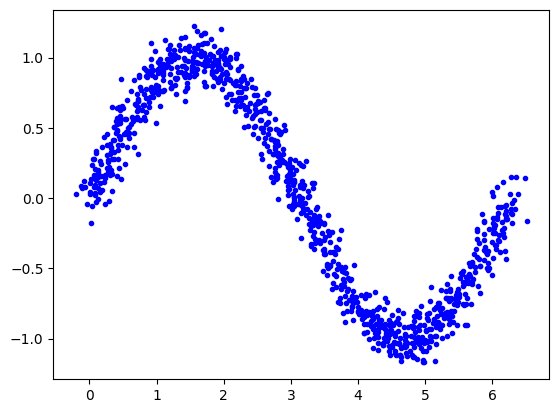

In [544]:
key, subkey = random.split(key)
uni_x= random.normal(key,(1,1000),dtype=np.float64)*0.1
key, subkey = random.split(key)
uni_y= random.normal(key,(1,1000),dtype=np.float64)*0.1
plt.plot(x[0]+uni_x[0], y[0]+uni_y[0], 'b.')

In [548]:
x = random.uniform(key,(1,1000),dtype=np.float64)*(2*np.pi)
y = jnp.sin(x)


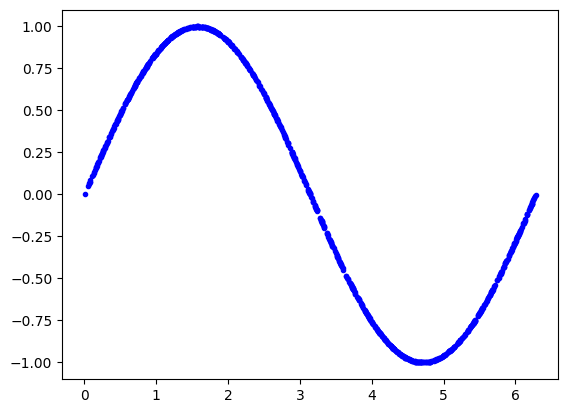

In [549]:
plt.plot(x[0], y[0], 'b.')

In [556]:
x

Array([], dtype=float32)

In [576]:
key, subkey = random.split(key)

In [619]:

x = random.uniform(key,(1,1000),dtype=np.float64)[0]*(2*np.pi)


train_x = random.choice(key,x,(1,600),replace=False)[0]
train_y = jnp.sin(train_x)

test_val = jnp.setdiff1d(x,train_x)


test_val = random.permutation(key,test_val)
test_x = random.choice(key,test_val,(1,200),replace=False)[0]
test_y = jnp.sin(test_x)

val_x = jnp.setdiff1d(test_val,test)
val_x = random.permutation(key,val_x)
val_y = jnp.sin(val_x)


In [640]:
x = [train_x,test_x,val_x]
y = [train_y,test_y,val_y]
train_x, test_x, val_x = list(map(lambda x: x+(random.normal(key,(1,len(x)),dtype=np.float64)*0.1)[0],x))
key, subkey = random.split(key)
train_y, test_y, val_y = list(map(lambda x: x+(random.normal(key,(1,len(x)),dtype=np.float64)*0.1)[0],y))

In [641]:
a = f'''{"mean":<10}|{"max":^10}|{"min":<10}
{train_x.mean():<10.3f}|{train_x.max():^10.3f}|{train_x.min():<10.3f}
{test_x.mean():<10.3f}|{test_x.max():^10.3f}|{test_x.min():<10.3f}
{val_x.mean():<10.3f}|{val_x.max():^10.3f}|{val_x.min():<10.3f}'''
print(a)

mean      |   max    |min       
3.154     |  6.417   |-0.228    
3.071     |  6.223   |0.008     
3.187     |  6.412   |-0.144    


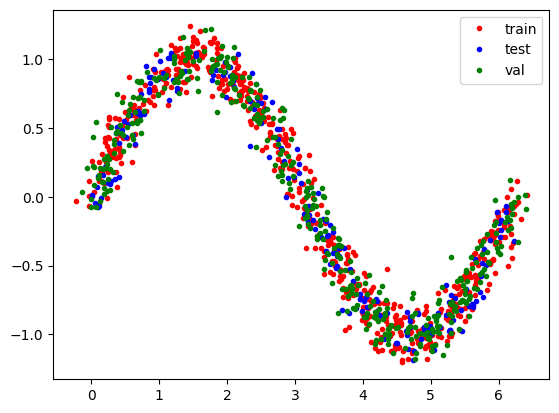

In [642]:
plt.plot(train_x,train_y,'r.',label='train')
plt.plot(test_x,test_y,'b.',label='test')
plt.plot(val_x,val_y,'g.',label='val')
plt.legend()

In [644]:
from jax.nn import relu
from jax import numpy as jnp

def feedforward_prediction(params, abscissa):
    """Each neuron is just the activation function applied to y = w*x + b, 
    except for the final layer, when no activation function is used.
    
    Parameters 
    ----------
    params : list
        Parameters of the network, with one list element per layer. 
        See notes below on network initialization.

    abscissa : ndarray
        Array of shape (batch_size, n_features)
    
    Returns
    -------
    preds : ndarray 
        Array of shape (batch_size, n_targets)
    """
    activations = abscissa
    
    #  Loop over every dense layer except the last
    for w, b in params[:-1]:
        outputs = jnp.dot(w, activations) + b  # apply affine transformation
        activations = selu(outputs)  #  apply nonlinear activation
        
    #  Now for the final layer
    w_final, b_final = params[-1] 
    final_outputs = jnp.dot(w_final, activations) + b_final 
    return final_outputs  # Final layer is just w*x + b with no activation

Array([0.        , 0.92477775, 0.        , 0.        , 0.70347095,
       0.26025876, 0.7604619 , 0.        , 1.0081869 , 0.871196  ,
       0.        , 0.94021577, 0.        , 0.        , 0.9488821 ,
       0.        , 0.36309066, 0.        , 0.        , 0.        ,
       0.        , 0.55788684, 0.07379843, 0.8843553 , 0.6698959 ,
       0.        , 0.        , 0.825447  , 0.        , 0.        ,
       1.143691  , 0.6821372 , 0.        , 0.11223914, 0.        ,
       0.        , 0.        , 1.1235322 , 0.05426377, 0.        ,
       0.        , 0.        , 0.12082176, 0.19349861, 0.        ,
       0.        , 0.        , 0.        , 0.2563235 , 0.688154  ,
       0.2882797 , 0.62927186, 0.        , 0.        , 0.        ,
       0.        , 0.76718163, 0.44934568, 0.9838543 , 0.5931533 ,
       0.        , 0.        , 0.        , 0.43846503, 0.        ,
       0.42972955, 0.        , 0.        , 0.        , 0.73071176,
       0.        , 1.0215054 , 0.        , 0.        , 0.42496